In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [10]:
sns.set_palette("Set1", 8, .75)
sns.set_style('whitegrid')

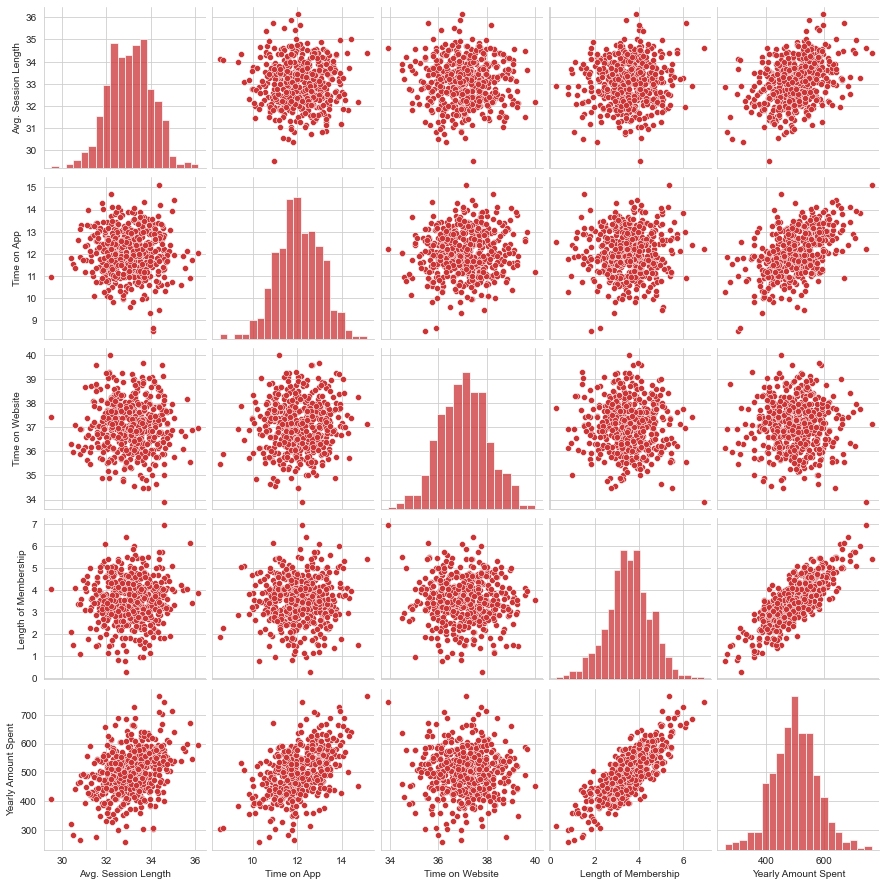

In [11]:
sns.pairplot(customers)

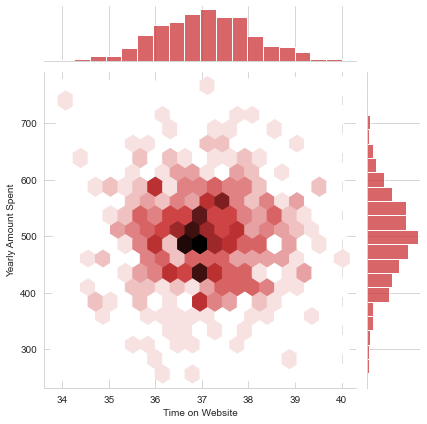

In [12]:

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers, kind = 'hex')

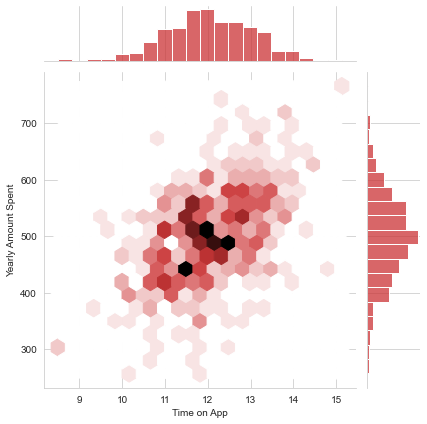

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers, kind = 'hex')

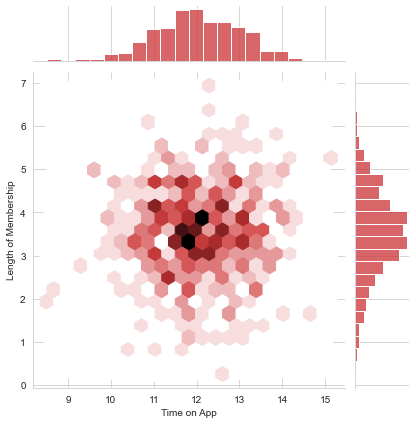

In [14]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

More time on the website and on the app is associated with higher yearly amount of spent. However, the time engaging in the app is more effective concearning purchases.

In [16]:

X = customers[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

In [19]:
# Training model
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
# The coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.618554
Time on App,38.923017
Time on Website,0.628807
Length of Membership,61.321361


# Interpreting the coefficients

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of $25.618554

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of $38.923017 

Holding all other features fixed, a 1 unit increase in Time on Website	 is associated with an increase of $0.628807

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of $61.321361 

<AxesSubplot:>

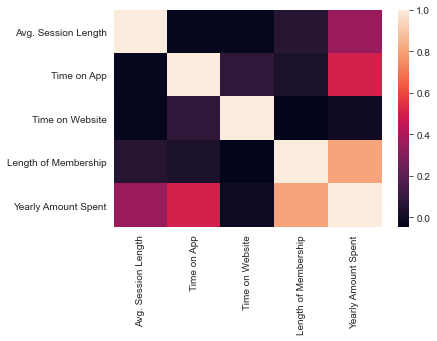

In [29]:
sns.heatmap(customers.corr())

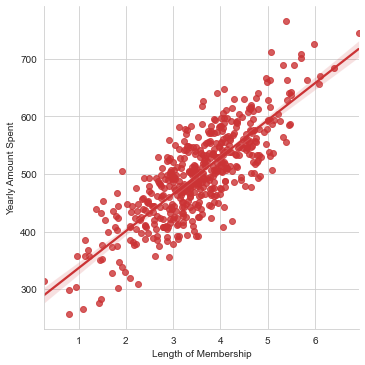

In [23]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

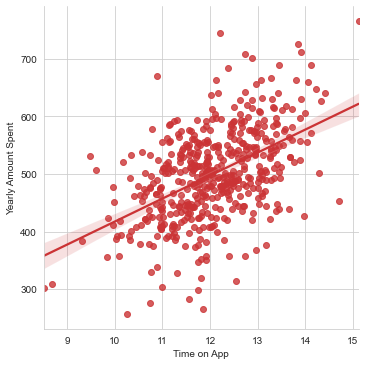

In [24]:
sns.lmplot(x='Time on App',y='Yearly Amount Spent',data=customers)

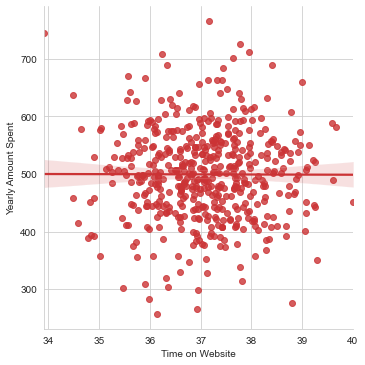

In [25]:
sns.lmplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

From the heatmap and the plots above, it is clear that Length of Membership followed by time spent on the app are associated with higher amounts spent.

In [28]:
## Predicting Test Data
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

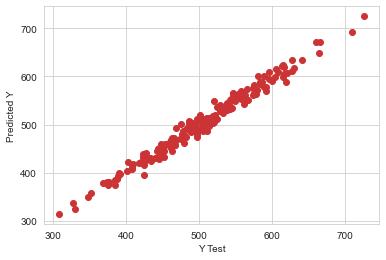

In [32]:
# Comparing predictions with real values
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [34]:
# calculate error metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.119208503887151
MSE: 106.40431285670567
RMSE: 10.315246621225576


Based on the values above, the model is a good fit to predict yearly amount spent, because the errors are not big, especially in an annual scenario.

[Text(0.5, 1.0, 'Residual Histogram')]

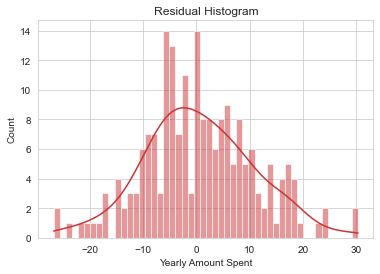

In [131]:
error = y_test-predictions

sns.histplot((error), bins = 50, kde = True ).set(title = "Residual Histogram")


The Residual Histogram analysis the quality of the regression by checking whether the variance is normally distributed. 
In this case, we have an approximately symmetric bell-shaped histogram which is reasonably evenly distributed around zero, indicating that the assumption of normality must be true.

we can standardize the error distribution and estimate that:
68% are within 1 standard deviation
95% are within 2 standard deviations
99.7% are within 3 standard deviations

In [121]:
def normalize(x):
    x_new = ((x - x.mean()) / x.std())
     
    # print(x_new)
    return x_new

In [136]:
df = pd.DataFrame(error)
a = (df['Yearly Amount Spent'])
b = (normalize(a))


[Text(0.5, 1.0, 'Residual Histogram')]

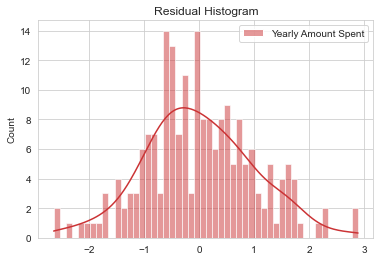

In [138]:
sns.histplot((([b])), bins = 50, kde = True).set(title = "Residual Histogram")
